<a href="https://colab.research.google.com/github/goglom/Digital-data-processing-and-discrete-analysis-methods/blob/main/problem_1/FourierSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [8]:
# Класс реализующий разложение в ряд Фурье
class FourierSeries:
    def __init__(self, func, count, a=-np.pi, b=np.pi):
        self.f = func
        self.count = count
        self.a = a
        self.b = b
        self.T = b - a
        self.a_0 = self.a_factor(0)
        self.a_factors = [self.a_factor(i) for i in range(1, self.count + 1)]
        self.b_factors = [self.b_factor(i) for i in range(1, self.count + 1)]

    def arg(self, n, t):
        return n * 2 * np.pi * t / self.T

    def a_factor(self, n):
        return integrate.quad(
            lambda t: 2 / self.T * self.f(t) * np.cos(self.arg(n, t)), self.a, self.b
        )[0]

    def b_factor(self, n):
        return integrate.quad(
            lambda t: 2 / self.T * self.f(t) * np.sin(self.arg(n, t)), self.a, self.b
        )[0]

    def __call__(self, _x):
        return self.a_0 / 2 + sum(self.a_factors[k - 1] * np.cos(self.arg(k, _x))
            + self.b_factors[k - 1] * np.sin(self.arg(k, _x)) 
            for k in range(1, self.count + 1))

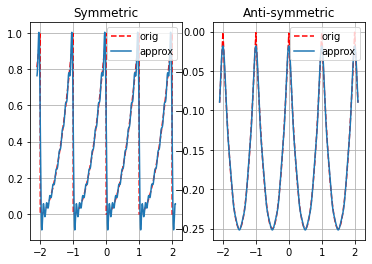

[]

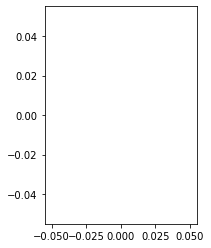

In [9]:

def make_periodic(func, left_bound, right_bound):
    return lambda t: func(left_bound + (t - left_bound) % (right_bound - left_bound))


orig_s_function = make_periodic(lambda _x: _x**2, 0, 1.)
orig_a_function = make_periodic(lambda _x: _x**2 - _x, 0, 1)

N = 10
x = np.linspace(-2.1, 2.1, 1000)

y_12 = orig_s_function(x)
y_22 = orig_a_function(x)

fs_1 = FourierSeries(orig_s_function, N, 0, 1)
fs_2 = FourierSeries(orig_a_function, N, -1, 1)
y_11 = fs_1(x)
y_21 = fs_2(x)

plt.figure("Functions")
plt.subplot(1, 2, 1)
plt.plot(x, y_12, 'r--', label="orig")
plt.plot(x, y_11, label="approx")
plt.title("Symmetric")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(x, y_22, 'r--', label="orig")
plt.plot(x, y_21, label="approx")
plt.title("Anti-symmetric")
plt.legend()
plt.grid(True)

plt.show()

n = [i for i in range(1, N + 1)]

plt.figure("Factors")

plt.subplot(1, 2, 1)
plt.plot()